# Plotting choropleth shapes

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import os

from cartopy.crs import PlateCarree

import geomappy as mp
import geomappy.plot_utils


In [2]:
os.chdir("../../../")

|Loading data on river plastic mobilisation when flood events happen (Roebroek et al., 2021).

In [3]:
df = gpd.read_file("data/countries/plastic_mobilisation.shp")
df.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       ...
       'NAME_ZH', 'e_1', 'e_10', 'e_20', 'e_50', 'e_100', 'e_200', 'e_500',
       'jump', 'geometry'],
      dtype='object', length=103)

The data shows like this when plotted within the geopandas dataframe.

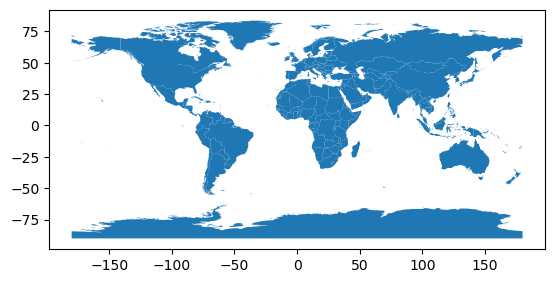

In [4]:
df.plot()
plt.show()

In its most simple form, the ``plot_shapes`` function does exactly the same (with some minor esthetic changes)

/usr/local/Caskroom/mambaforge/base/envs/geomappy/lib/python3.12/site-packages/geopandas/plotting.py:307: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  collection = ax.scatter(x, y, cmap=cmap, **kwargs)


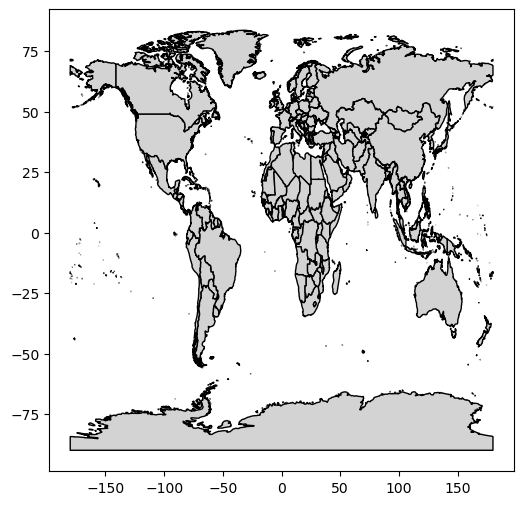

In [5]:
mp.plot_shapes(df=df)
plt.show()

Choropleth capabilities are available when selecting a column to express the values. In this case `e_10` expresses plastic mobilisation when relatively low-impact floods occur.

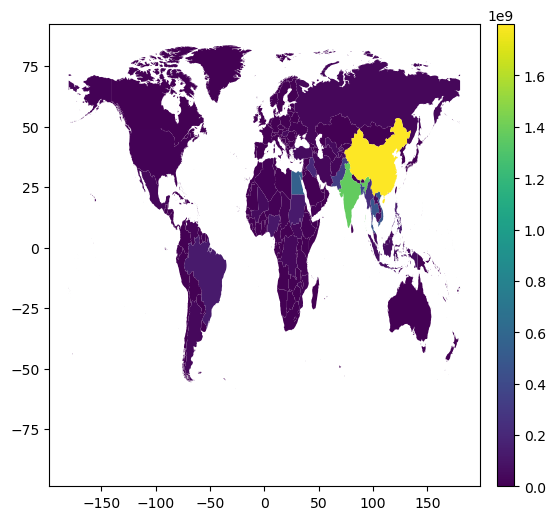

In [6]:
mp.plot_shapes(df=df, values='e_10')
plt.show()

Similarly to ``plot_raster`` it provides ``vmin``, ``vmax`` and ``bins`` to enhance visibility.

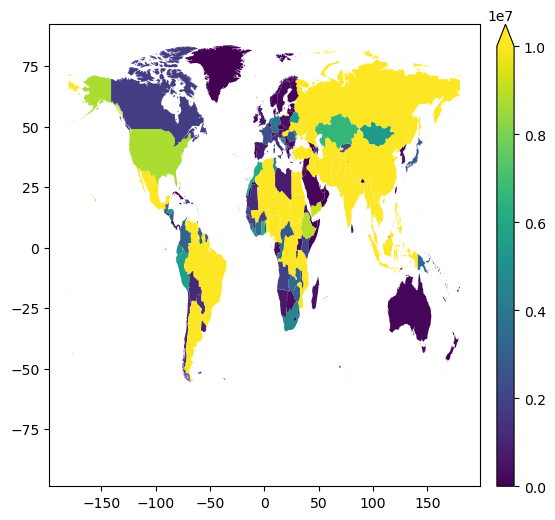

In [7]:
mp.plot_shapes(df=df, values='e_10', vmax=10000000)
plt.show()

In [20]:
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

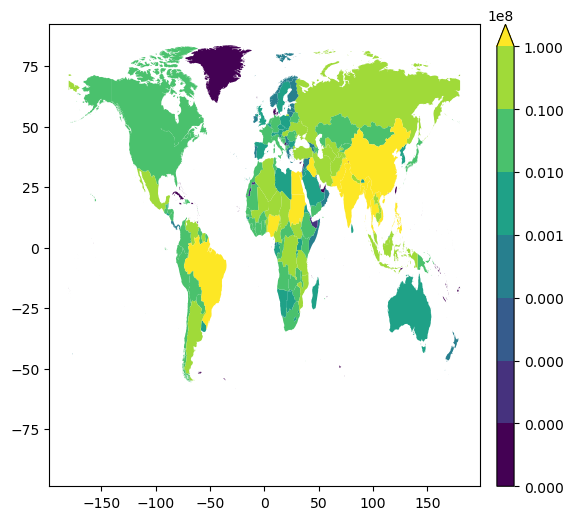

In [21]:
mp.plot_shapes(df=df, values='e_10', bins=bins)
plt.show()

To plot a binary classification of the data, provide a single bin:

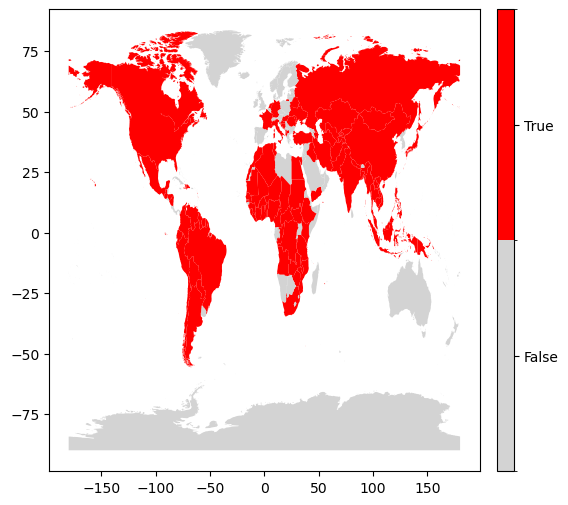

In [27]:
mp.plot_shapes(df=df, values='e_10', bins=[1000000])
plt.show()

Again a basemap is easily provided

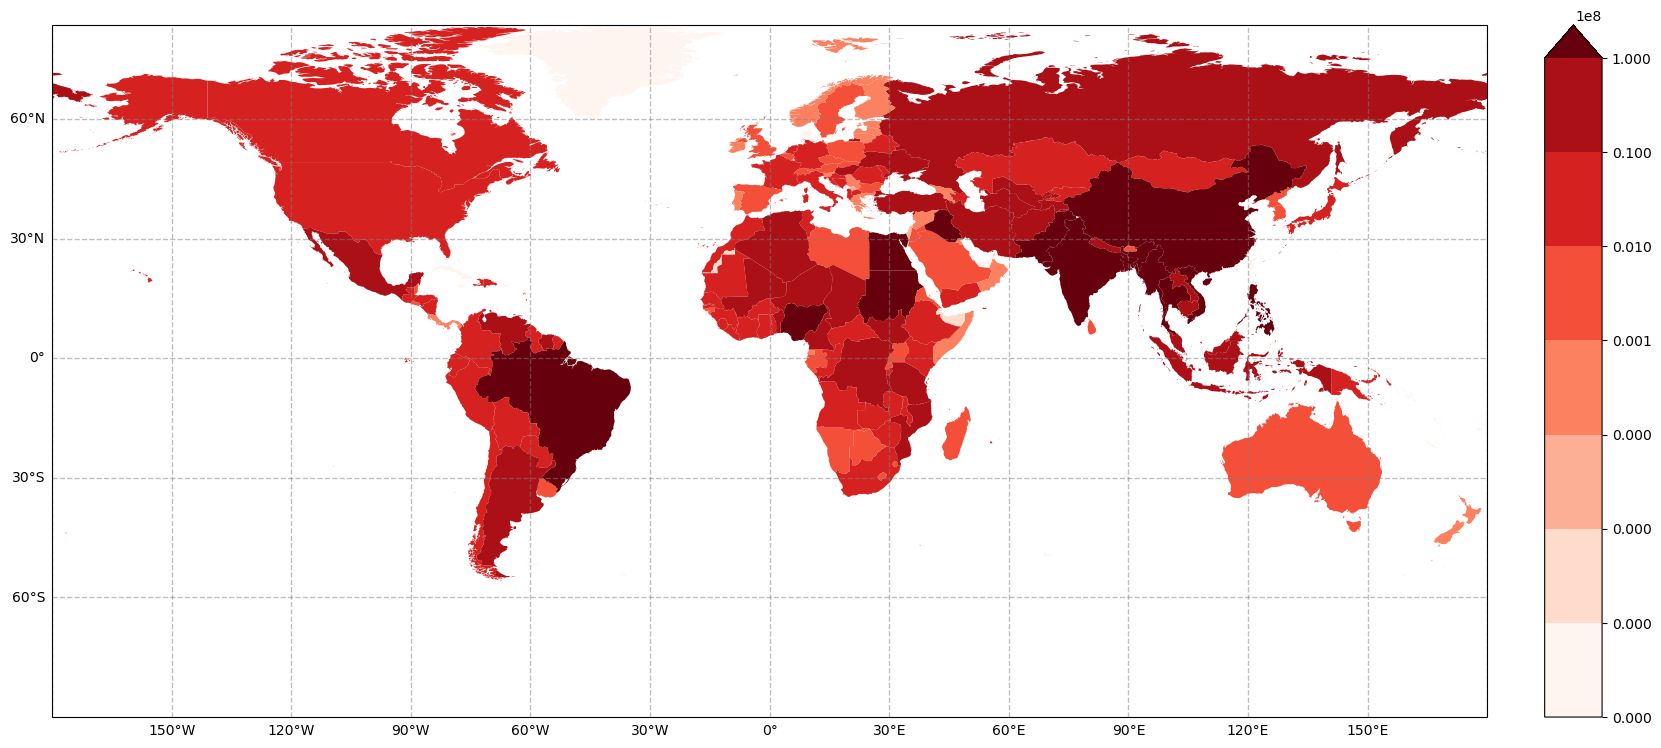

In [22]:
f, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': PlateCarree()})
bounds = df.total_bounds
extent = bounds[0], bounds[2], bounds[1], bounds[3]
ax.set_extent(extent)
geomappy.plot_utils.add_gridlines(ax, 30)
geomappy.plot_utils.add_ticks(ax, 30)

mp.plot_shapes(df=df, values='e_10', cmap="Reds", bins=bins, ax=ax)
plt.show()

The legend is hard to interpret this way. To solve this, the legend items can be overloaded with their E notation. In addition, a customised label can be placed next to the colorbar.

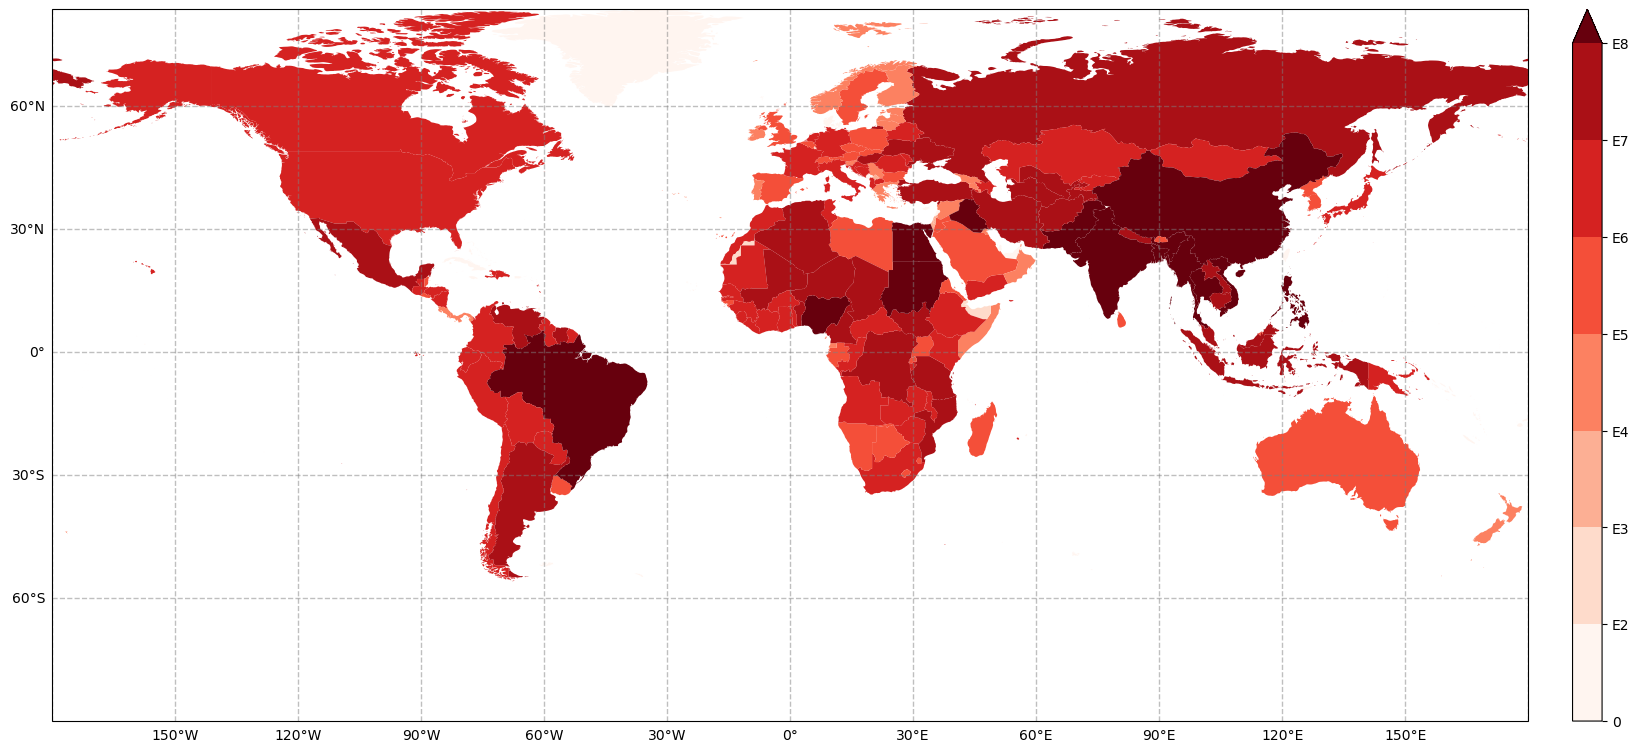

In [23]:
f, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': PlateCarree()})
bounds = df.total_bounds
extent = bounds[0], bounds[2], bounds[1], bounds[3]
ax.set_extent(extent)
geomappy.plot_utils.add_gridlines(ax, 30)
geomappy.plot_utils.add_ticks(ax, 30)

legend_ax = mp.create_colorbar_axes(ax=ax, width=0.02, pad=0.03)
im, l = mp.plot_shapes(df=df, values='e_10', cmap="Reds", bins=bins, ax=ax, legend_ax=legend_ax)
l.ax.set_yticks(l.ax.get_yticks(), [0, "E2", "E3", "E4", "E5", "E6", "E7", "E8"])

plt.show()